In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [2]:
df = pd.read_csv('old_faithful.csv')
df.head(3)

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74


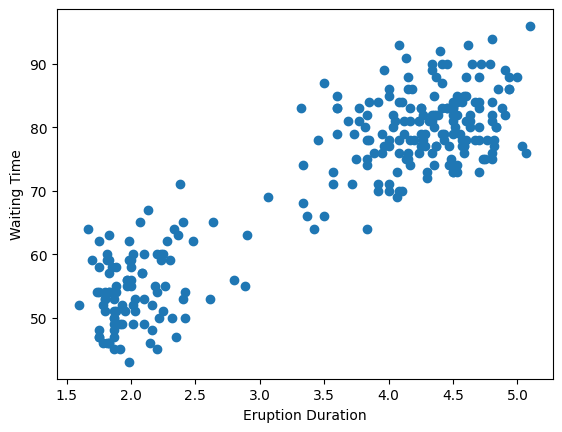

In [3]:
plt.scatter(df['eruptions'], df['waiting'])
plt.xlabel('Eruption Duration')
plt.ylabel('Waiting Time');

In [7]:
X = df[['eruptions', 'waiting']]
kmeans = KMeans(n_clusters=2)
df['cluster'] = kmeans.fit_predict(X)

In [5]:
centers = kmeans.cluster_centers_
if centers[0, 0] < centers[1, 0]:
    cluster_names = ('short', 'long')
else:
    cluster_names = ('long', 'short')

In [6]:
# Plot the clustered data points and regression lines
plt.figure(figsize=(10, 6))
colors = ['blue', 'red']

# Scatter plot for each cluster
for cluster in sorted(cluster_names.keys()):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['eruptions'], cluster_data['waiting'],
                color=colors[cluster], label=f"Cluster '{cluster_names[cluster]}'", alpha=0.6)

# Plot the cluster centers as black 'X' markers
plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='X', s=100, label='Centroids')

# Fit and plot a regression line for each cluster
for cluster in sorted(cluster_names.keys()):
    cluster_data = df[df['cluster'] == cluster]
    x = cluster_data['eruptions']
    y = cluster_data['waiting']
    
    # Fit a linear regression line using np.polyfit
    slope, intercept = np.polyfit(x, y, 1)
    
    # Generate x values for the regression line plot
    x_range = np.linspace(x.min(), x.max(), 100)
    y_fit = slope * x_range + intercept
    
    plt.plot(x_range, y_fit, color=colors[cluster],
             linestyle='--', linewidth=2, label=f"{cluster_names[cluster].capitalize()} regression")

plt.xlabel('Eruption Duration')
plt.ylabel('Waiting Time')
plt.title('Old Faithful: KMeans Clustering with Regression Lines')
plt.legend()
plt.grid(True)
plt.show()

AttributeError: 'tuple' object has no attribute 'keys'

<Figure size 1000x600 with 0 Axes>